1. Data Preparation

In [1]:
# Importing necessary libraries for data handling and model building
import numpy as np  # Importing numpy for numerical operations
import tensorflow as tf  # Importing TensorFlow for deep learning functionality
from tensorflow import keras  # Importing Keras API for building and training models
from tensorflow.keras import layers  # Importing Keras layers to build neural networks
from tensorflow.keras.models import Sequential  # Importing Sequential model for linear stacking of layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [2]:
# mount Google Drive to access files stored there
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Define the path to your dataset (the path will be different frp, what u have)
data_dir = "/content/drive/MyDrive/Boat dataset(Assignment).zip"

!mkdir /content/DSML_DL # Make a new directory in Colab to store the extracted dataset

!unzip -q '{data_dir}' -d /content/DSML_DL # Unzip the zipped file. the '-q' hides the extraction logs, u can remove it to see what happens while extracting


In [7]:
data_dir = '/content/DSML_DL/boat data/test'

In [8]:
# Defining parameters for image processing
batch_size = 32  # Set batch size for loading data (number of samples per batch)
img_height = 224  # Set height for resizing input images
img_width = 224  # Set width for resizing input images
epochs = 5  # Set the number of training epochs

In [9]:
# Load and split data into training and validation sets using image_dataset_from_directory

# Training set
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,  # Path to the dataset
  validation_split=0.2,  # Split 20% of the data for validation
  subset="training",  # Specify this call to get the training subset
  seed=123,  # Set a seed for reproducibility (same data split every time)
  image_size=(img_height, img_width),  # Resize images to match the required input shape
  batch_size=batch_size  # Set batch size for loading images
)

Found 4774 files belonging to 24 classes.
Using 3820 files for training.


In [10]:
# Validation set (this uses the same validation_split=0.2 to ensure consistency)
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,  # Path to the dataset
  validation_split=0.2,  # Same validation split to get the remaining 20% for validation
  subset="validation",  # Specify this call to get the validation subset
  seed=123,  # Use the same seed to ensure the same split as for training data
  image_size=(img_height, img_width),  # Resize images to the same size as training data
  batch_size=batch_size  # Same batch size for validation data

)

Found 4774 files belonging to 24 classes.
Using 954 files for validation.


In [11]:
print("Training class names:\n",train_ds.class_names)

Training class names:
 ['Alilaguna', 'Ambulanza', 'Barchino', 'Cacciapesca', 'Caorlina', 'Gondola', 'Lanciafino10m', 'Lanciafino10mBianca', 'Lanciafino10mMarrone', 'Lanciamaggioredi10mBianca', 'Lanciamaggioredi10mMarrone', 'Motobarca', 'Motopontonerettangolare', 'MotoscafoACTV', 'Mototopo', 'Patanella', 'Polizia', 'Raccoltarifiuti', 'Sandoloaremi', 'Sanpierota', 'Topa', 'VaporettoACTV', 'VigilidelFuoco', 'Water']


In [12]:
print("Validation class names:\n",val_ds.class_names)

Validation class names:
 ['Alilaguna', 'Ambulanza', 'Barchino', 'Cacciapesca', 'Caorlina', 'Gondola', 'Lanciafino10m', 'Lanciafino10mBianca', 'Lanciafino10mMarrone', 'Lanciamaggioredi10mBianca', 'Lanciamaggioredi10mMarrone', 'Motobarca', 'Motopontonerettangolare', 'MotoscafoACTV', 'Mototopo', 'Patanella', 'Polizia', 'Raccoltarifiuti', 'Sandoloaremi', 'Sanpierota', 'Topa', 'VaporettoACTV', 'VigilidelFuoco', 'Water']


2. Model Architecture

In [13]:
# Define a sequential CNN model
model = Sequential(
    [
        # First convolutional block
        # 32 filters, 3x3 kernel, ReLU activation, input shape for RGB image
        layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)),

        # Second convolutional block
        layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        # Downsampling again
        layers.MaxPooling2D(),
        # Dropout to regularize
        layers.Dropout(0.25),

        # Third convolutional block

        # Deeper conv layer with 128 filters
        layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        # Downsample
        layers.MaxPooling2D(),
        # More dropout for regularization
        layers.Dropout(0.25),

        # Fully connected (dense) layers

        # Flatten 3D feature maps into 1D vector for dense layers
        layers.Flatten(),

        # Dense layer with 128 neurons
        layers.Dense(128, activation='relu'),

        # Dropout of 50% to further prevent overfitting
        layers.Dropout(0.5),

        # Output layer with 24 neuron (muti-class classification), sigsoftmax activation for probability output
        layers.Dense(24, activation='softmax')
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3. Model Compilation

In [14]:
# Compile the model with optimizer, loss, and evaluation metric
model.compile(
    # Using Adam optimizer - an adaptive learning rate optimization algorithm # Using Adam optimizer - an adaptive learning rate optimization algorithm
    optimizer= tf.keras.optimizers.Adam(),
    # Using Sparse Categorical Crossentropy as the loss function
    # This is appropriate for multi-class classification problems
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    # Tracking accuracy as the evaluation metric during training and validation
    # Accuracy measures the fraction of correctly classified samples
    metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 401408)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    51,380,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,476,696 (196.37 MB)

 Trainable params: 51,476,696 (196.37 MB)

 Non-trainable params: 0 (0.00 B)

4. Training the Model

In [16]:

# Train the model using the training dataset and validate on the validation dataset
history = model.fit(
    train_ds,           # Training dataset - contains the images and their corresponding labels
    validation_data=val_ds,  # Validation dataset - used to evaluate model performance during training
    epochs=epochs       # Number of complete passes through the training dataset
)


Epoch 1/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 1815s 15s/step - accuracy: 0.1371 - loss: 324.5705 - val_accuracy: 0.4633 - val_loss: 2.4545
Epoch 2/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 1815s 15s/step - accuracy: 0.3993 - loss: 2.2252 - val_accuracy: 0.4958 - val_loss: 2.4700
Epoch 3/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 1812s 15s/step - accuracy: 0.4613 - loss: 1.9857 - val_accuracy: 0.5283 - val_loss: 2.1894
Epoch 4/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 1825s 15s/step - accuracy: 0.4916 - loss: 1.8132 - val_accuracy: 0.5430 - val_loss: 2.1328
Epoch 5/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 1812s 15s/step - accuracy: 0.5288 - loss: 1.6985 - val_accuracy: 0.5597 - val_loss: 2.0221


Plot Performance

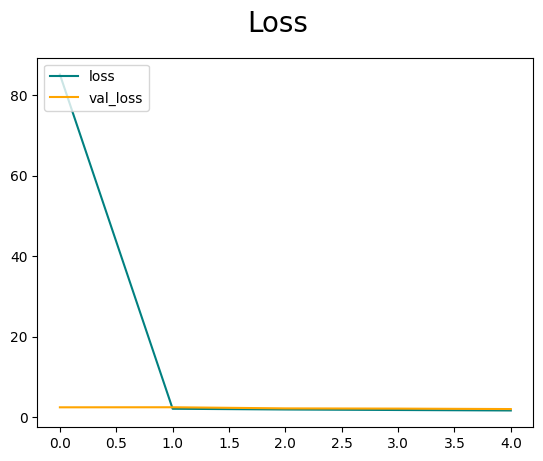

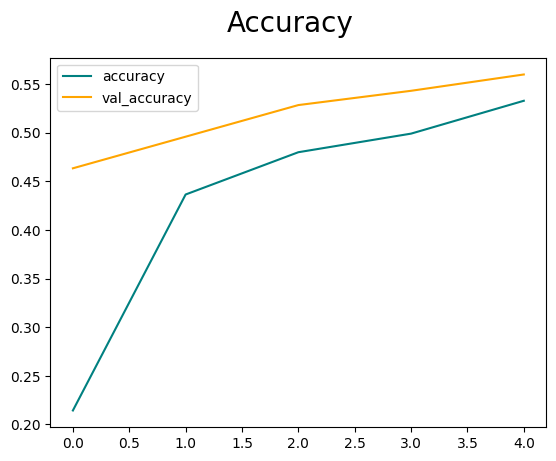

In [19]:
# Import the pyplot module from matplotlib for plotting
from matplotlib import pyplot as plt

# Create a new figure object to contain our plot
fig = plt.figure()

# Plot the training loss values from the model's history
plt.plot(history.history['loss'], color='teal', label='loss')

# Plot the validation loss values from the model's history
plt.plot(history.history['val_loss'], color='orange', label='val_loss')

# Add a title to the plot with larger font size (20)
fig.suptitle('Loss', fontsize=20)

# Add a legend to the plot in the upper left corner
plt.legend(loc="upper left")

# Display the plot
plt.show()



# Create a new figure object to contain our plot
fig = plt.figure()

# Plot training accuracy in teal color with label 'accuracy'
plt.plot(history.history['accuracy'], color='teal', label='accuracy')

# Plot validation accuracy in orange color with label 'val_accuracy'
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')

# Add a main title to the plot with font size 20
fig.suptitle('Accuracy', fontsize=20)

# Add a legend in the upper left corner of the plot
# This will show the color-coded labels for both lines
plt.legend(loc="upper left")

# Display the plot
plt.show()

5. Evaluation

In [20]:
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(img_path, img_height, img_width):
    """
    Load and preprocess an image for model prediction.

    Args:
        img_path (str): Path to the image file
        img_height (int): Target height for resizing
        img_width (int): Target width for resizing

    Returns:
        numpy.ndarray: Preprocessed image array with shape (1, height, width, channels)
                      ready for model input
    """

    # Load the image from file path and resize to target dimensions
    img = image.load_img(img_path, target_size=(img_height, img_width))

    # Convert the PIL image to a numpy array with shape (height, width, channels)
    # For RGB images, channels=3; for grayscale, channels=1
    img_array = image.img_to_array(img)

    # Add a batch dimension (axis=0) to make it (1, height, width, channels)
    # This is required because models expect batches of images, even if just one
    img_array = np.expand_dims(img_array, axis=0)

    # Print the shape for debugging/verification
    # Should output: (1, img_height, img_width, 3) for RGB images
    print("Processed image shape:", img_array.shape)

    return img_array

In [21]:
# Path to your image
img_path = '/content/DSML_DL/boat data/train/20130412_053519_05280.jpg'

# Preprocess the image
img_array = preprocess_image(img_path, img_height, img_width)

# Predict
prediction = model.predict(img_array)
prediction

Processed image shape: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


array([[1.0991206e-06, 7.4688353e-07, 4.5031433e-11, 2.3732654e-15,
        3.3921456e-17, 1.5761989e-12, 3.3523047e-14, 3.8939771e-09,
        1.2540380e-07, 6.7071113e-09, 4.2693312e-08, 1.8055529e-07,
        1.5609023e-08, 1.2341815e-07, 7.8556035e-08, 9.4875077e-09,
        2.8882480e-10, 1.8919510e-12, 1.1116303e-17, 9.5293754e-18,
        1.6272617e-10, 9.9999762e-01, 7.4074996e-14, 4.1440785e-14]],
      dtype=float32)

the predicted image is: VaporettoACTV


array([[[ 95, 104, 104],
        [103, 111, 111],
        [ 92, 100,  99],
        ...,
        [  9,  15,  23],
        [ 42,  61,  74],
        [ 25,  36,  53]],

       [[ 97, 106, 106],
        [ 99, 106, 106],
        [ 94, 102, 101],
        ...,
        [  8,  13,  21],
        [ 56,  76,  87],
        [ 49,  61,  77]],

       [[ 98, 108, 108],
        [ 91,  99,  99],
        [ 96, 104, 103],
        ...,
        [ 10,  15,  22],
        [ 52,  70,  81],
        [ 75,  90, 105]],

       ...,

       [[167, 157, 157],
        [164, 154, 154],
        [175, 167, 164],
        ...,
        [124, 137, 135],
        [149, 162, 160],
        [ 92, 103, 101]],

       [[177, 167, 167],
        [175, 165, 165],
        [180, 170, 168],
        ...,
        [ 96, 109, 107],
        [131, 144, 142],
        [117, 128, 126]],

       [[180, 170, 170],
        [176, 166, 166],
        [178, 170, 166],
        ...,
        [ 97, 110, 108],
        [ 93, 106, 104],
        [133, 144, 142]]], dtype=uint8)
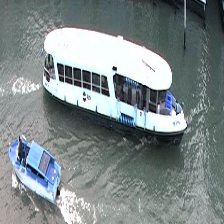

In [43]:
# Get the class names from the training dataset
# These are typically the names of the subdirectories in your training folder
image_names = train_ds.class_names  # or val_ds.class_names, they should be the same

# Get the predicted class for the first image in prediction results:
# 1. prediction[0] gets the prediction probabilities for the first image
# 2. np.argmax() finds the index with highest probability
# 3. Use that index to get the corresponding class name from image_names
predicted_class = image_names[np.argmax((prediction[0]))]
print('the predicted image is:',predicted_class)

import cv2
img = cv2.imread(img_path)
img = cv2.resize(img,(224,224))
img

1. Transfer Learning

For better performance, we can use a pre-trained model like EfficientNet.

In [25]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2


In [27]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [31]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(24, activation='softmax')
])


In [33]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

epochs = 2

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/2
120/120 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.4455 - loss: 2.0085 - val_accuracy: 0.6730 - val_loss: 1.2083
Epoch 2/2
120/120 ━━━━━━━━━━━━━━━━━━━━ 299s 2s/step - accuracy: 0.6114 - loss: 1.3544 - val_accuracy: 0.6667 - val_loss: 1.1089


In [34]:
# Preprocess the image
img_array = preprocess_image(img_path, img_height, img_width)

# Predict
prediction = model.predict(img_array)
prediction

Processed image shape: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[4.7273188e-05, 1.4869524e-05, 1.6976169e-07, 9.4774130e-08,
        1.7801361e-07, 6.0919706e-07, 8.1282178e-07, 3.7397040e-06,
        4.2132206e-06, 3.2144214e-07, 8.5330448e-08, 3.2554093e-05,
        1.3623724e-06, 9.0482285e-07, 1.2328521e-04, 1.0318523e-06,
        7.9905647e-07, 6.8136942e-06, 7.4098671e-07, 2.6948246e-07,
        4.2557881e-06, 9.9975091e-01, 1.6831910e-08, 4.5798847e-06]],
      dtype=float32)

In [37]:
image_names = train_ds.class_names  # or val_ds.class_names, they should be the same
image_names[np.argmax((prediction[0]))]

'VaporettoACTV'